In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set()
import re
%matplotlib notebook

In [2]:
df = pd.read_csv('Salaries.csv')
df.head()

C:\Python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df = df.drop(['Id','EmployeeName','TotalPay','Year','Notes','Agency','Status'], axis=1)
df = df.dropna(how='any')
df = df[df!=0].dropna()
df = df.sort_values(by='TotalPayBenefits')
df.tail()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits
72928,Asst Med Examiner,272856,23727.9,38954.5,66198.9,401736.88
72927,"Battalion Chief, Fire Suppress",186236,131218,29648.3,57064.9,404167.27
36159,"Lieutenant, Fire Suppression",128809,220909,13126.3,44430.1,407274.78
110536,Asst Med Examiner,270222,6009.22,67956.2,71580.5,415767.94
110532,Asst Med Examiner,318835,10713,60563.5,89540.2,479652.21


In [4]:
data = df.tail()
data.set_index('JobTitle', inplace=True)
data = data.rename(columns=lambda x: re.sub('([a-z])([A-Z])','\g<1> \g<2>',x))
data = data / 1000
pd.options.display.float_format = '{:,.0f}'.format
data

,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay Benefits
JobTitle,,,,,
Asst Med Examiner,273,24,39,66,402
"Battalion Chief, Fire Suppress",186,131,30,57,404
"Lieutenant, Fire Suppression",129,221,13,44,407
Asst Med Examiner,270,6,68,72,416
Asst Med Examiner,319,11,61,90,480


<IPython.core.display.Javascript object>


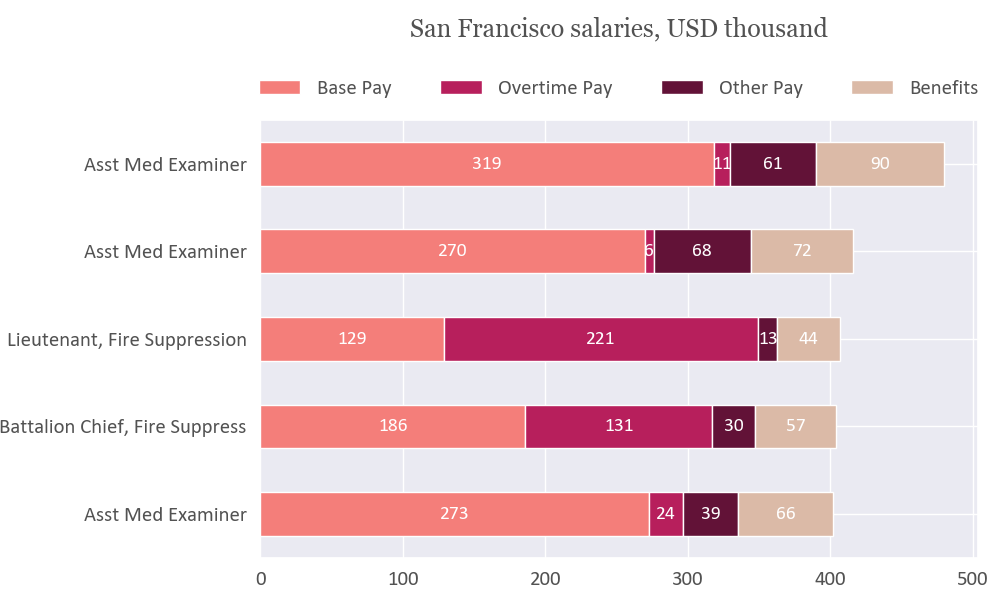

In [9]:
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']

ax = data.iloc[:, 0:4].plot.barh(align='center', stacked=True, figsize=(10, 6), color=colors)
plt.tight_layout()

title = plt.title('San Francisco salaries, USD thousand', pad=60, fontsize=18, color=font_color, **csfont)
title.set_position([.5, 1.02])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(15)
plt.xticks(color=font_color, **hfont)
plt.yticks(color=font_color, **hfont)

legend = plt.legend(loc='center',
       frameon=False, 
       bbox_to_anchor=(0., 1.02, 1., .102), 
       mode='expand', 
       ncol=4, 
       borderaxespad=-.46, # remove padding
       prop={'size': 15, 'family':'Calibri'})

for text in legend.get_texts():
    plt.setp(text, color=font_color) # Legend font color

# Annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=14,
            **hfont)

plt.subplots_adjust(top=0.8, left=0.26)

In [10]:
filename = 'mpl-stacked'
plt.savefig(filename+'.png')